In [1]:
from google.colab import files
uploaded = files.upload()

Saving MSN.csv to MSN.csv


In [2]:
#Import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv('MSN.csv')
df = df[['Price']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index
df

# Split the data into training, testing, and validation arcording to 7:2:1
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]


In [4]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 26.7 MB/s eta 0:00:00


In [5]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=16006.938, Time=5.70 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=16013.079, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=16010.894, Time=0.22 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=16010.755, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=16011.224, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=16012.962, Time=2.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=16012.948, Time=1.14 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=16013.883, Time=0.63 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=16013.823, Time=1.23 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=16012.641, Time=0.58 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=16011.851, Time=0.56 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=16012.007, Time=0.63 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=16014.850, Time=2.77 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=16005.048, Time=2.27 sec
 ARIMA(1,1,2)(0,0,0

ARIMA(order=(2, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [6]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(n_periods=len(y_test))

# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Price'])
y_pred_val =  model.predict(n_periods=len(y_val))

In [7]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[112252.06781884 112328.70269616 112098.95162124 111989.9728517
 112193.33257102 112329.23133664 112155.32970246 111998.18381998
 112140.56517044 112313.20197529 112203.42740519 112020.98485685
 112097.99035602 112284.76444435 112239.83709992 112053.87153017
 112068.17774609 112248.63347112 112262.82489976 112092.05677763
 112052.04901376 112209.53985791 112272.23891976 112130.98275197
 112049.04496411 112171.76572548 112269.27727282 112166.73040467
 112057.41123786 112138.79611471]


In [8]:
# 7. Tính RMSE, MSE, MAPE
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error

valid_mse = mean_squared_error(y_val, y_pred_val)
test_mse = mean_squared_error(y_test, y_pred)

valid_rmse = np.sqrt(valid_mse)
test_rmse = np.sqrt(test_mse)

valid_mae = mean_absolute_error(y_val, y_pred_val)
test_mae = mean_absolute_error(y_test, y_pred)

valid_mape = mean_absolute_percentage_error(y_val, y_pred_val)*100
test_mape = mean_absolute_percentage_error(y_test, y_pred)*100

print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)
print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

Validation RMSE: 44446.36325052186
Testing RMSE: 28937.78300594736
Validation MAE: 44096.0958495834
Testing MAE: 27217.137749398174
Validation MAPE: 65.84762150841888
Testing MAPE: 33.71062389917128


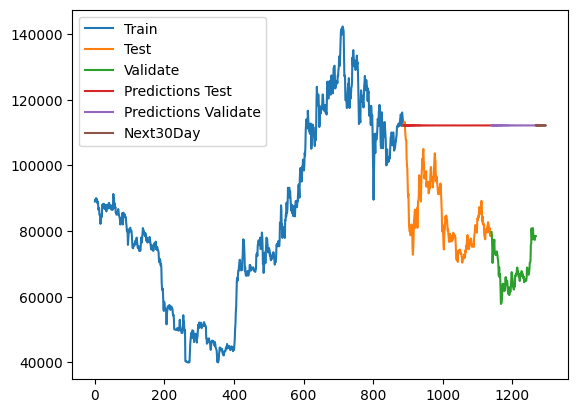

In [9]:
# 8.Vẽ hình
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(val_data.index, val_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Validate', 'Predictions Test', 'Predictions Validate','Next30Day'])
plt.show()

<h1># Split the data into training, testing, and validation arcording to 6:3:1

In [10]:
train_size = int(0.6 * len(df))
test_size = int(0.3 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [11]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=13577.862, Time=1.25 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=13574.870, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=13574.379, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=13574.351, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=13573.085, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=13576.333, Time=0.39 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 2.082 seconds


ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [13]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(n_periods=len(y_test))

# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Price'])
y_pred_val =  model.predict(n_periods=len(y_val))

In [12]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[112588. 112588. 112588. 112588. 112588. 112588. 112588. 112588. 112588.
 112588. 112588. 112588. 112588. 112588. 112588. 112588. 112588. 112588.
 112588. 112588. 112588. 112588. 112588. 112588. 112588. 112588. 112588.
 112588. 112588. 112588.]


In [14]:
# 7. Tính RMSE, MSE, MAPE

valid_mse = mean_squared_error(y_val, y_pred_val)
test_mse = mean_squared_error(y_test, y_pred)

valid_rmse = np.sqrt(valid_mse)
test_rmse = np.sqrt(test_mse)

valid_mae = mean_absolute_error(y_val, y_pred_val)
test_mae = mean_absolute_error(y_test, y_pred)

valid_mape = mean_absolute_percentage_error(y_val, y_pred_val)*100
test_mape = mean_absolute_percentage_error(y_test, y_pred)*100

print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)
print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

Validation RMSE: 44869.61743763813
Testing RMSE: 24285.370680503802
Validation MAE: 44522.375
Testing MAE: 20273.773684210526
Validation MAPE: 66.47819304206563
Testing MAPE: 24.47267915852414


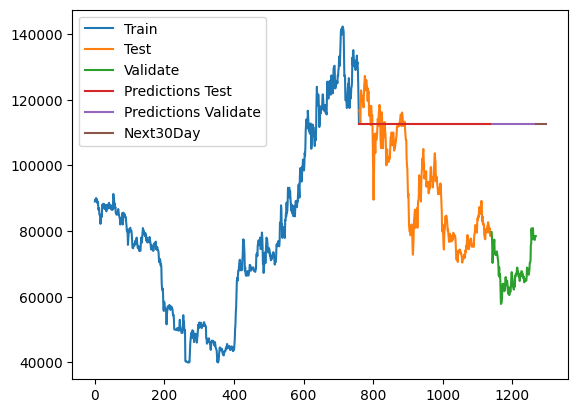

In [15]:
# 8.Vẽ hình
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(val_data.index, val_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Validate', 'Predictions Test', 'Predictions Validate','Next30Day'])
plt.show()

<h1># Split the data into training, testing, and validation arcording to 5:3:2

In [16]:
train_size = int(0.5 * len(df))
test_size = int(0.3 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [17]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=inf, Time=1.08 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=11503.464, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=11452.015, Time=0.09 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=11414.440, Time=0.30 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.81 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=11374.643, Time=0.41 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=inf, Time=1.12 sec
 ARIMA(0,2,3)(0,0,0)[0]             : AIC=11348.884, Time=0.19 sec
 ARIMA(1,2,3)(0,0,0)[0]             : AIC=inf, Time=1.76 sec
 ARIMA(0,2,4)(0,0,0)[0]             : AIC=inf, Time=2.71 sec
 ARIMA(1,2,4)(0,0,0)[0]             : AIC=inf, Time=4.26 sec
 ARIMA(0,2,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.47 sec

Best model:  ARIMA(0,2,3)(0,0,0)[0]          
Total fit time: 14.259 seconds


ARIMA(order=(0, 2, 3), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [18]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(n_periods=len(y_test))

# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Price'])
y_pred_val =  model.predict(n_periods=len(y_val))

In [19]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[109797.81914281 110511.86737605 110766.6224304  111021.37748475
 111276.1325391  111530.88759345 111785.6426478  112040.39770215
 112295.1527565  112549.90781085 112804.6628652  113059.41791955
 113314.1729739  113568.92802825 113823.6830826  114078.43813695
 114333.1931913  114587.94824565 114842.7033     115097.45835435
 115352.2134087  115606.96846305 115861.7235174  116116.47857175
 116371.2336261  116625.98868045 116880.7437348  117135.49878915
 117390.2538435  117645.00889785]


In [20]:
# 7. Tính RMSE, MSE, MAPE

valid_mse = mean_squared_error(y_val, y_pred_val)
test_mse = mean_squared_error(y_test, y_pred)

valid_rmse = np.sqrt(valid_mse)
test_rmse = np.sqrt(test_mse)

valid_mae = mean_absolute_error(y_val, y_pred_val)
test_mae = mean_absolute_error(y_test, y_pred)

valid_mape = mean_absolute_percentage_error(y_val, y_pred_val)*100
test_mape = mean_absolute_percentage_error(y_test, y_pred)*100

print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)
print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

Validation RMSE: 73162.43599028332
Testing RMSE: 64424.964301573
Validation MAE: 69446.77908605563
Testing MAE: 50727.98427699709
Validation MAPE: 98.24378137974851
Testing MAPE: 52.60291667994718


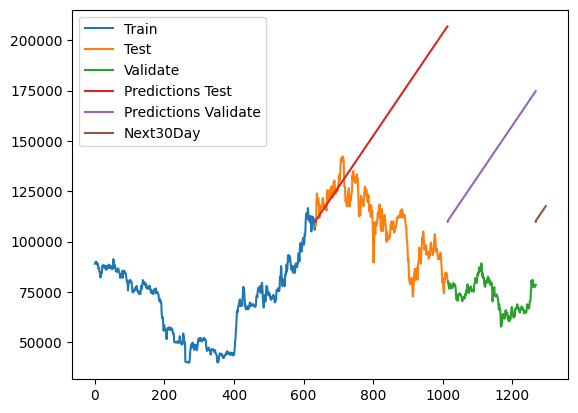

In [21]:
# 8.Vẽ hình
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(val_data.index, val_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Validate', 'Predictions Test', 'Predictions Validate','Next30Day'])
plt.show()